In [11]:
#Import libraries
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'
import pandas as pd




# Data loading

In [12]:
#load excel file
path_data = Path("")
data = pd.ExcelFile(path_data/"DS Test Datasets.xlsx")

In [14]:
#Data description
sheet = data.sheet_names
sheet

['Time Series Problem', 'ML & EDA Problem']

# *****Probleme 1 : Time Series Forecasting*****

In [15]:
time_s = pd.read_excel(data, sheet[0], parse_dates=["DATE"])
time_s

,SKU,DATE,#Units
0,SKU-01,2011-11-01,1412.08
1,SKU-01,2012-02-01,914.52
2,SKU-01,2012-05-01,1181.66
3,SKU-01,2012-08-01,1261.42
4,SKU-01,2012-11-01,1366.19
5,SKU-01,2013-02-01,1227.46
6,SKU-01,2013-05-01,918.96
7,SKU-01,2013-08-01,611.58
8,SKU-01,2013-11-01,641.65
9,SKU-01,2014-02-01,1293.63


In [16]:
time_s1 = time_s.loc[:12,:]
time_s2 = time_s.loc[13:,:]

time_s2 = time_s2.reset_index(drop=True)

In [17]:
#indexing of time series for the construction of model
time_s1["index"] = np.arange(len(time_s1))
time_s2["index"] = np.arange(len(time_s2))

#one column duplicate for plotting and models
time_s1["val"] = time_s1["#Units"]
time_s2["val"] = time_s2["#Units"]

In [18]:
#Second time series
time_s2

,SKU,DATE,#Units,index,val
0,SKU-02,2011-11-01,2633.10,0,2633.10
1,SKU-02,2012-02-01,1193.14,1,1193.14
2,SKU-02,2012-05-01,2269.85,2,2269.85
3,SKU-02,2012-08-01,1593.09,3,1593.09
4,SKU-02,2012-11-01,1651.90,4,1651.90
5,SKU-02,2013-02-01,1615.81,5,1615.81
6,SKU-02,2013-05-01,1195.64,6,1195.64
7,SKU-02,2013-08-01,1452.91,7,1452.91
8,SKU-02,2013-11-01,1465.88,8,1465.88
9,SKU-02,2014-02-01,1736.77,9,1736.77


# Let work with the first time serie time_s1

Text(0, 0.5, 'SKU-01')

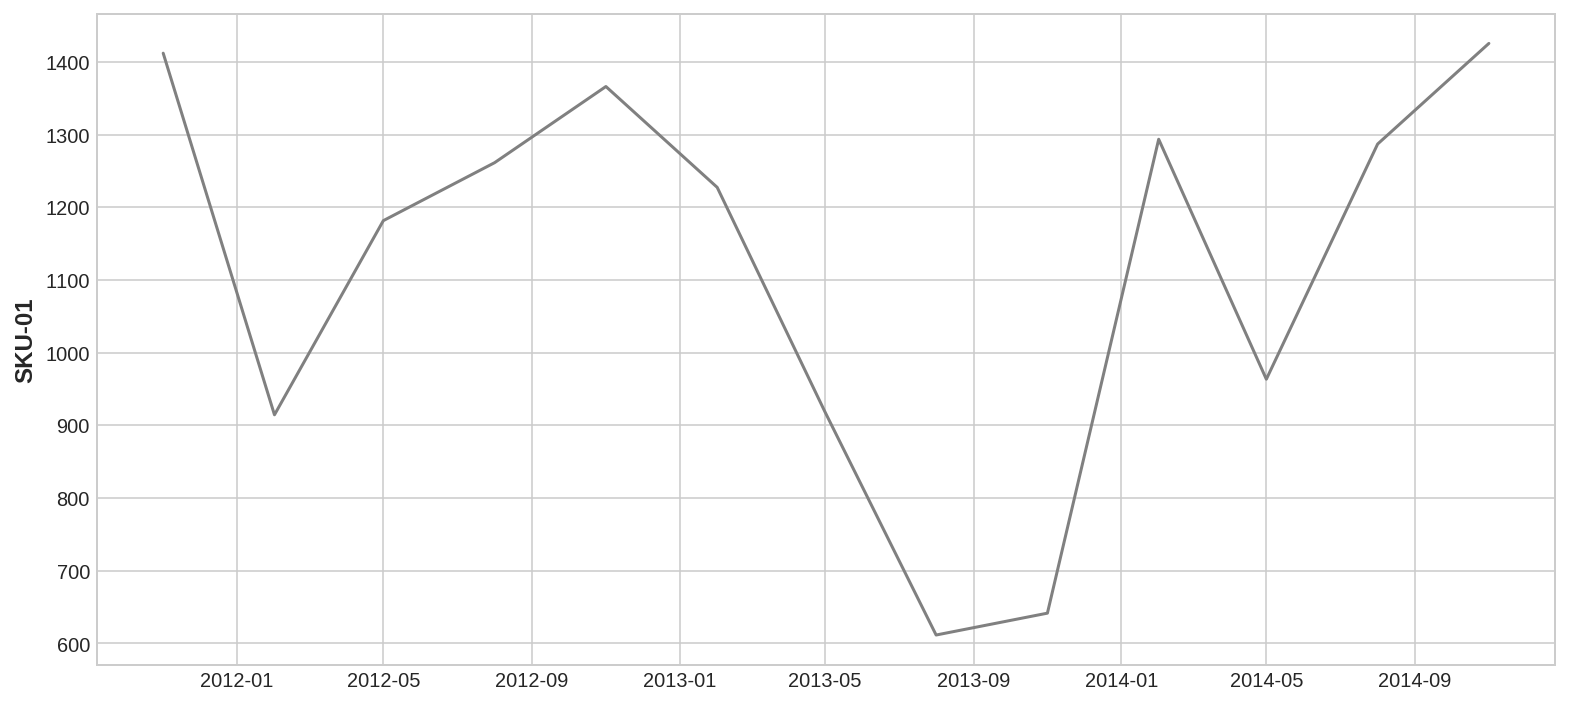

In [43]:

fig, ax = plt.subplots()
ax.plot('DATE', 'val', data=time_s1, color='0.50')
ax.set_ylabel("SKU-01")

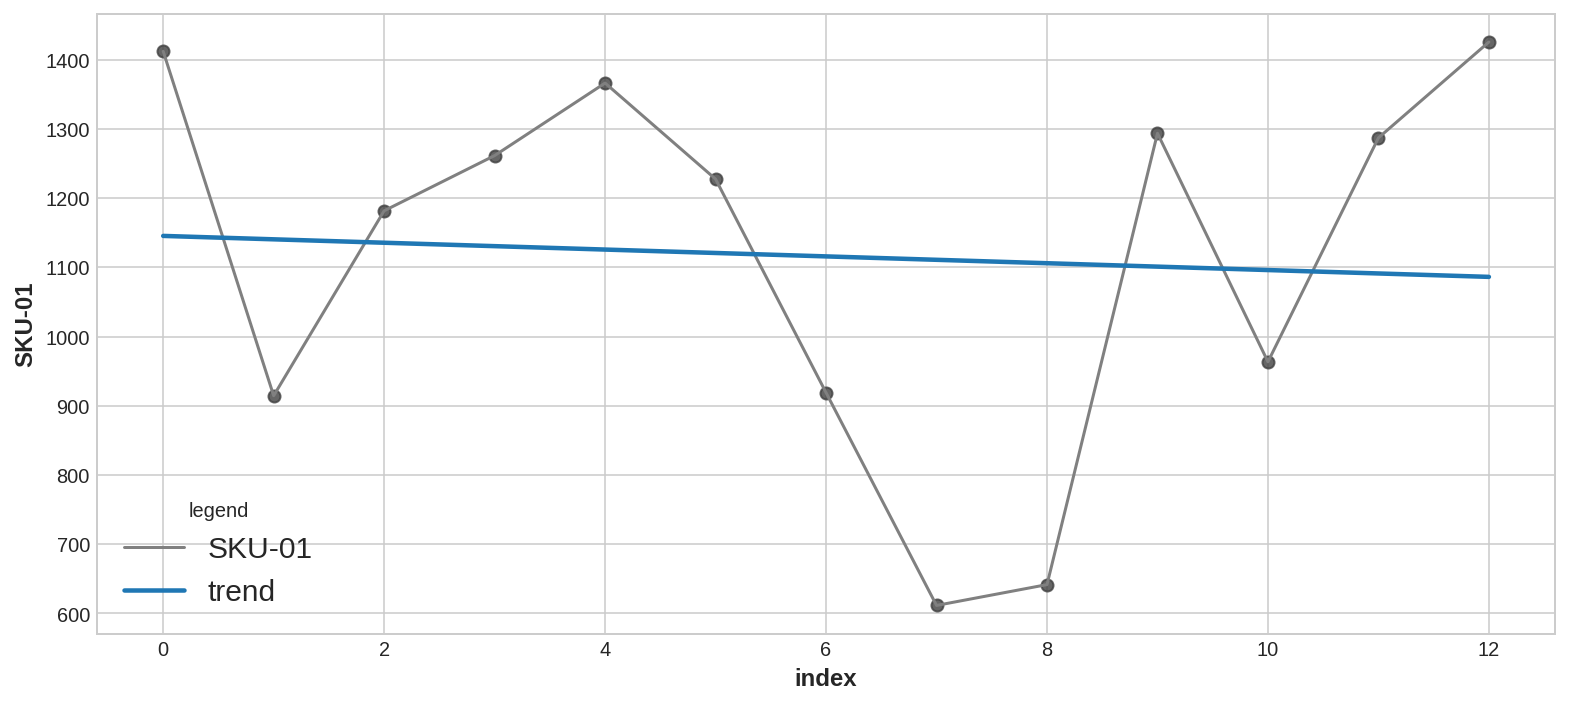

In [45]:
#Let us see trend of tms1
fig, ax = plt.subplots()
ax.plot('index', 'val', data=time_s1, color='0.50')
ax = sns.regplot(x='index', y='val', data=time_s1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_ylabel("SKU-01")
ax.legend(["SKU-01", "trend"], title="legend", prop={'size':15})

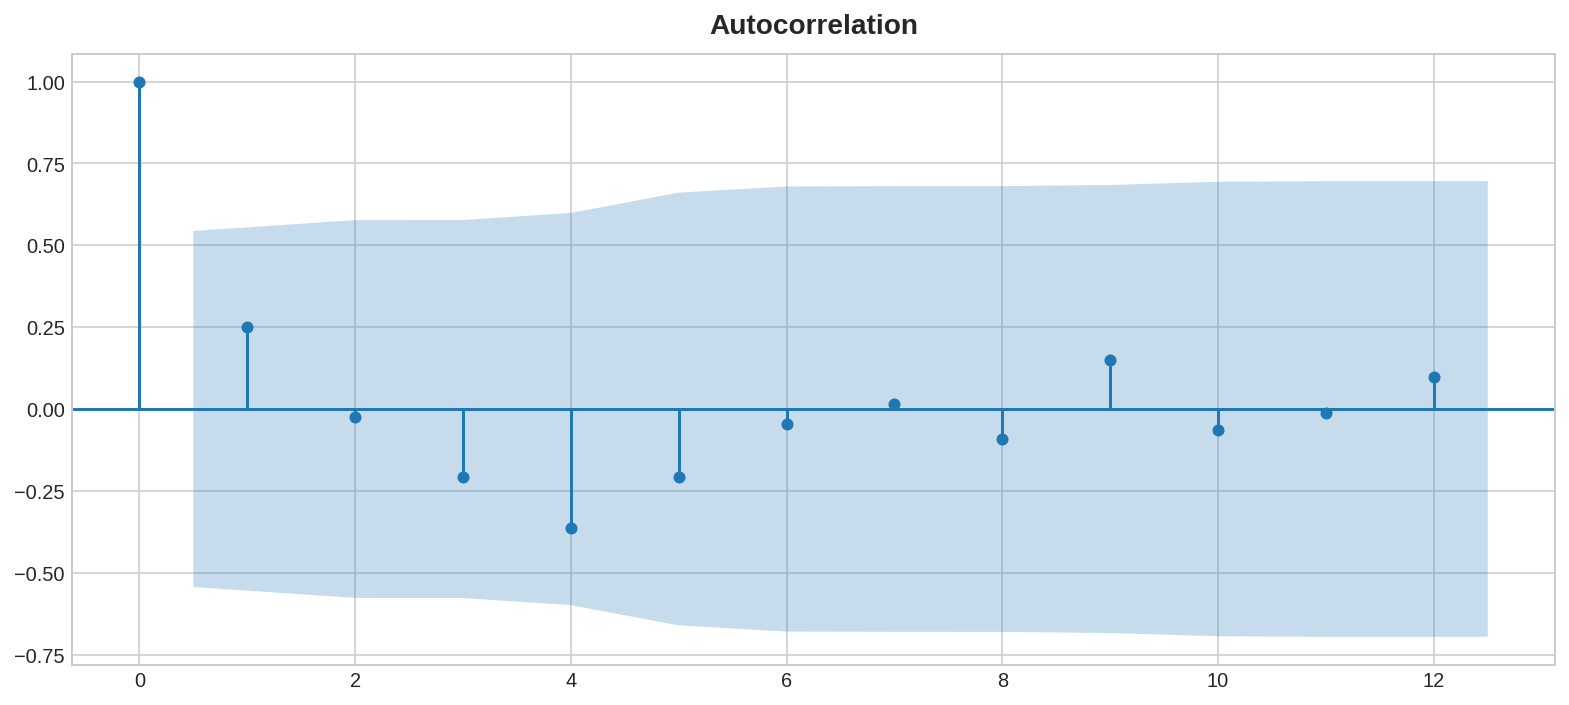

In [24]:
#let see acf
plot_acf = sm.graphics.tsa.plot_acf(time_s1["val"])


In [25]:
#Let's apply Arma model 
arima_model = auto_arima(time_s1['val'], start_p=1, start_q=1,
                          max_p=4, max_q=4,
                          seasonal=False,
                            trace=True,random_state=12,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)
arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=194.494, Time=1.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=222.067, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=193.390, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=194.780, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=187.158, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=186.163, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=187.080, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=189.088, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.374 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:                        SARIMAX   Log Likelihood                 -91.081
Date:                Sat, 12 Feb 2022   AIC                            186.163
Time:                        16:06:58   BIC                            187.293
Sample:                             0   HQIC                           185.930
                                 - 13                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1115.7869     95.335     11.704      0.000     928.934    1302.640
sigma2       7.13e+04   4.74e+04      1.503      0.133   -2.17e+04    1.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.31   Prob(JB):                         0.50
Heteroskedasticity (H):               1.17   Skew:                            -0.68
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
arima_model.fit(time_s1["val"])
#The value that is predict by arma model is :
arima_model.predict(1)

array([1115.78692308])

In [27]:
#Let's apply exponential smoothing
span = 2
alpha = 2/(span+1)
#training
simpleExpSmooth_model = ExponentialSmoothing(time_s1['val']).fit(smoothing_level=alpha,optimized=False)

#prediction of the next quarter
simpleExpSmooth_model.forecast(1)

13    1348.052244
dtype: float64

<AxesSubplot:>

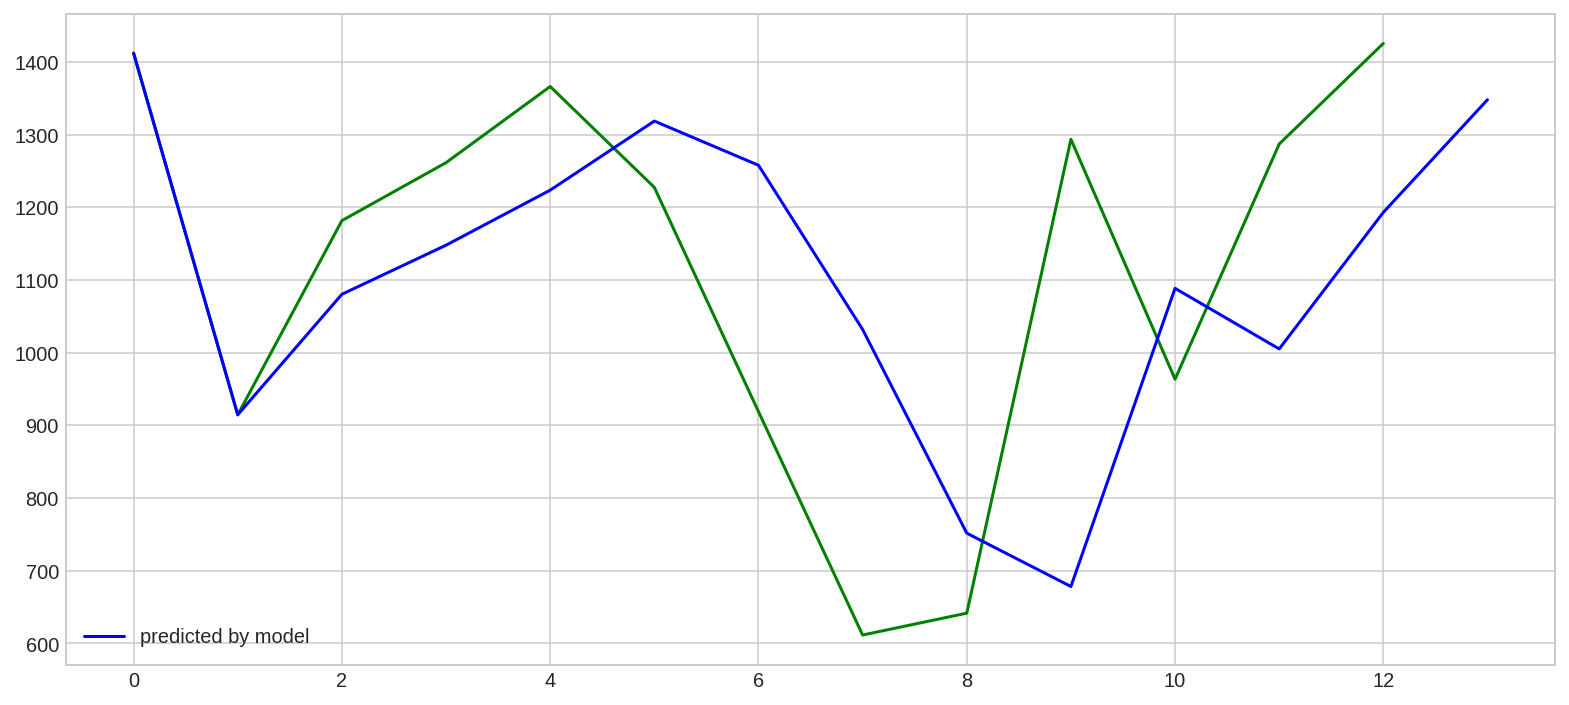

In [29]:
#Let us observe the curve of values predicted by model and real values
fig, ax = plt.subplots()
values_pred = list()

for e in range(1,len(time_s1)):
    SES = ExponentialSmoothing(time_s1.loc[:e,'val']).fit(smoothing_level=alpha,optimized=False)
    values_pred.append(SES.forecast(1).iloc[0])

#differentes values predicted
values_pred = time_s1.loc[:1,"val"].to_list()+values_pred 
values_pred = pd.DataFrame(values_pred, index=list(range(len(values_pred))), columns=["predicted by model"])


#graph plotting
ax.plot("index", "val", data=time_s1, color="green")
values_pred.plot(ax=ax, color="blue")


<AxesSubplot:>

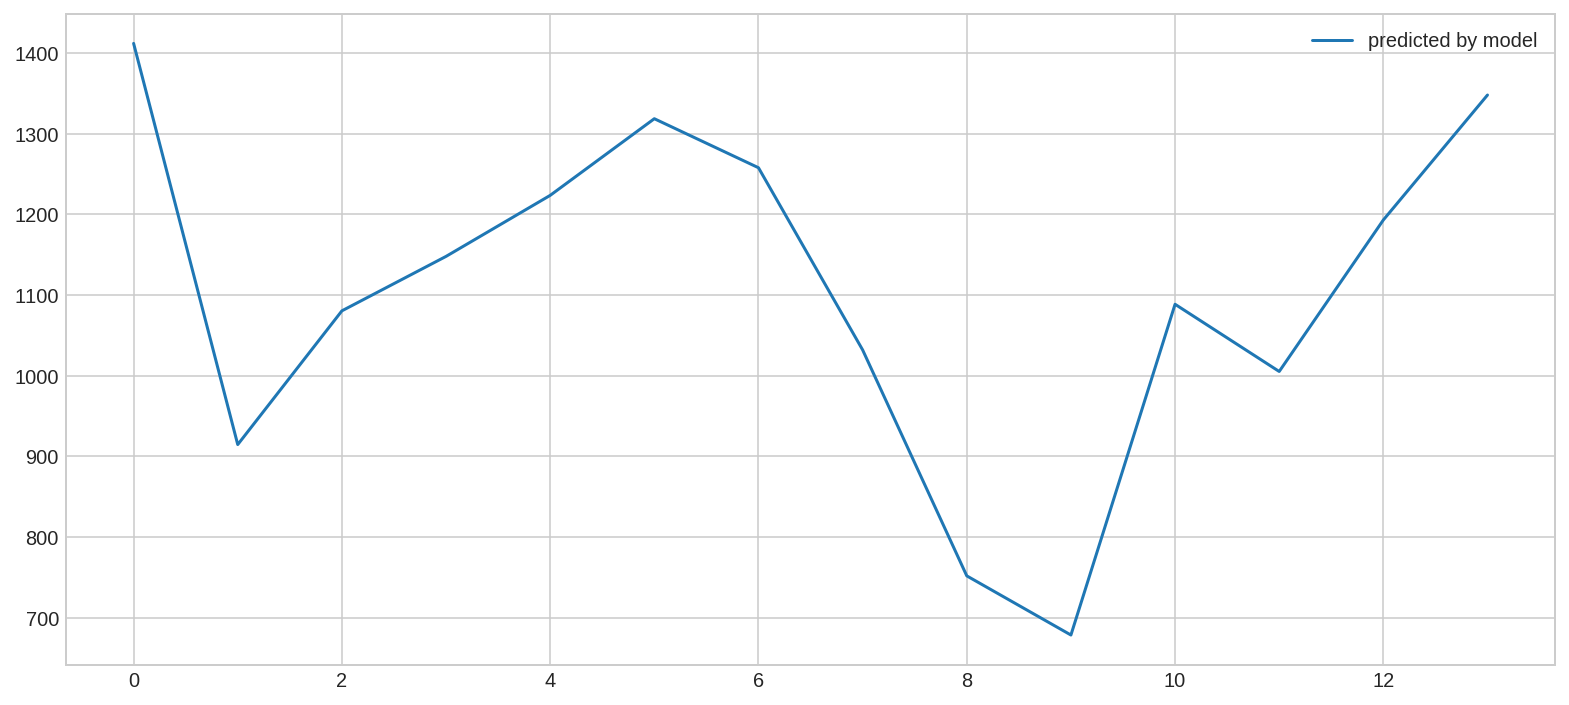

In [30]:
#graph of predicted values
values_pred.plot()

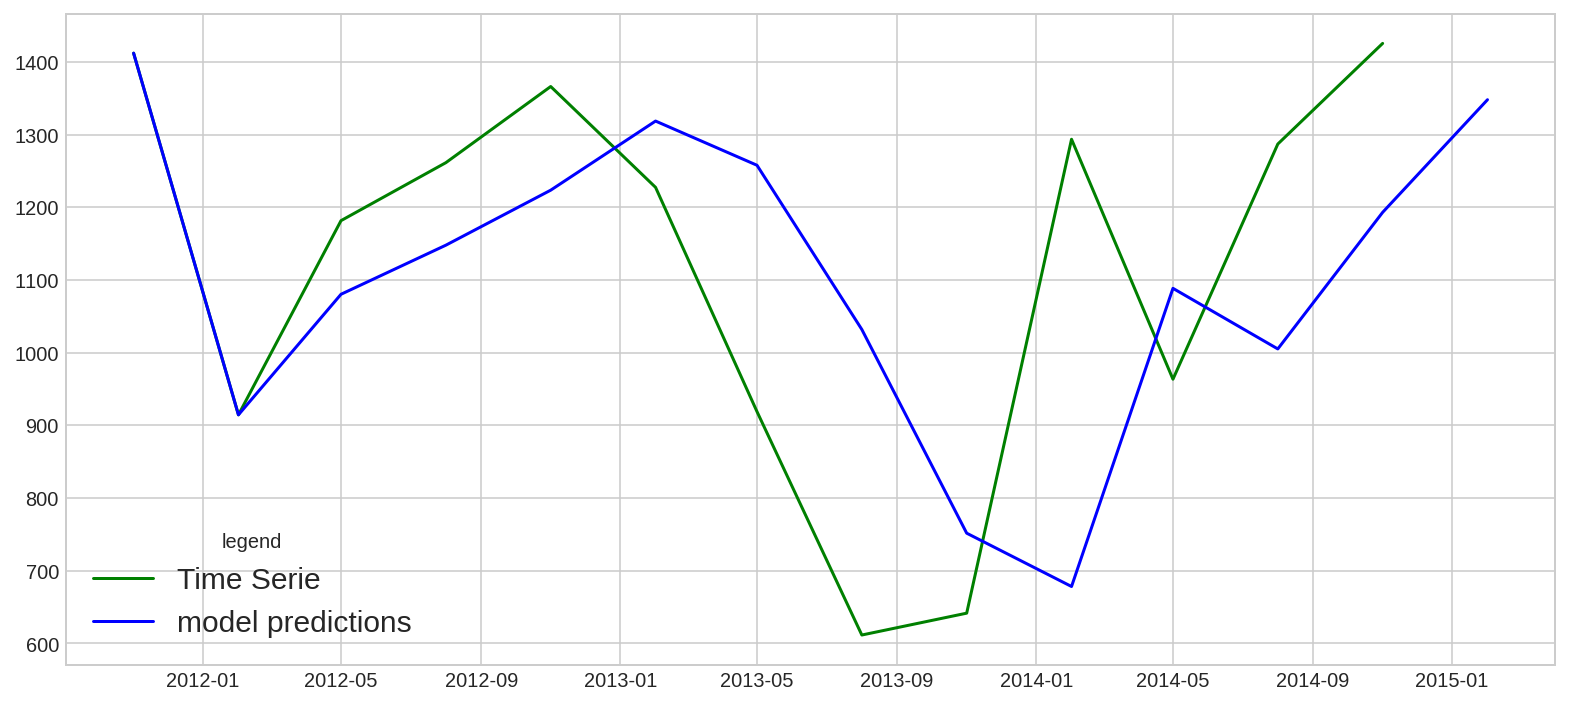

In [49]:
#graphics with date
date = time_s1.DATE.to_list()
values_pred["DATE"] = date+[pd.Timestamp('2015-02-01 00:00:00')]
values_pred['index'] = np.arange(len(values_pred))
fig, ax = plt.subplots()
ax.plot("DATE", "val", data=time_s1, color="green")
ax.plot("DATE", "predicted by model", data=values_pred, color="blue")
ax.legend(["Time Serie", "model predictions"], title="legend", prop={"size":15})

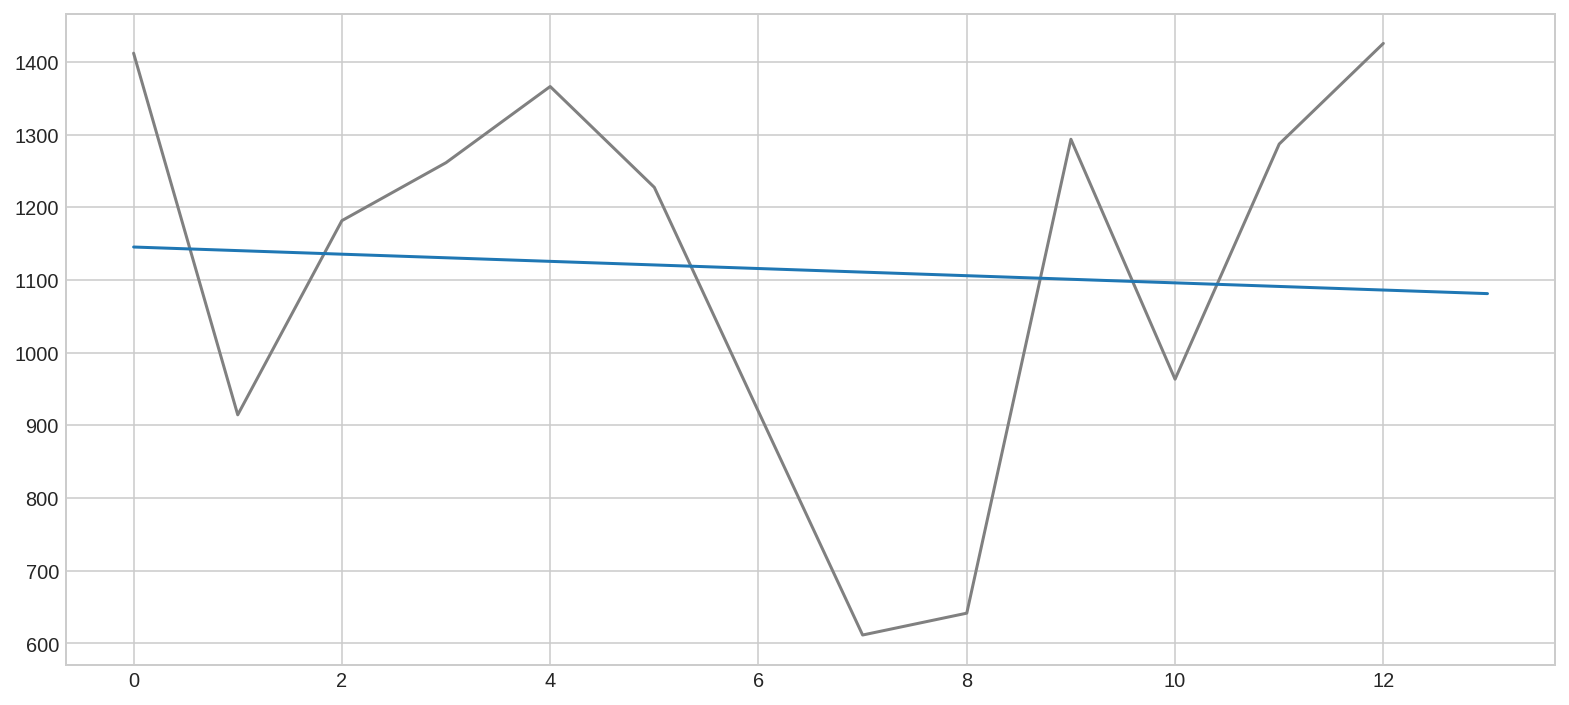

In [32]:
#Let use linearregression
model_l = LinearRegression()
X = time_s1.loc[:,["index"]]
y = time_s1.loc[:,"val"]

model_l.fit(X, y)

val_to_predict = pd.DataFrame({"index": [13]})
val_to_predict = pd.concat([X, val_to_predict], axis=0)

predictions = model_l.predict(val_to_predict)

fig, ax = plt.subplots()

ax.plot('index', 'val', data=time_s1, color='0.50')
plt.plot(predictions)


In [33]:
#The predicted value for the next quarter is :
predictions[-13]

1140.4465384615385

In [34]:
#Let's choose the best model
y_value = time_s1["val"].to_list()
y_pred = list(predictions[:-1])
score1 = mean_absolute_error(y_value, y_pred)
print(f"score for linear regression: {score1}")
y_pred = values_pred["predicted by model"].iloc[:-1].to_list()
score2 = mean_absolute_error(y_value, y_pred)
print(f"score for Exponential Smoothing: {score2} ")

score for linear regression: 233.67242603550298
score for Exponential Smoothing: 197.88950026727042 


PREDICTION

In [35]:
#The best model is exponential smoothing
pred = values_pred["predicted by model"].to_list()[-1]
print(f"For the next quater predicton is: {pred} ")

For the next quater predicton is: 1348.0522440308519 


# Let work with the second time serie time_s2 

Text(0, 0.5, 'SKU-02')

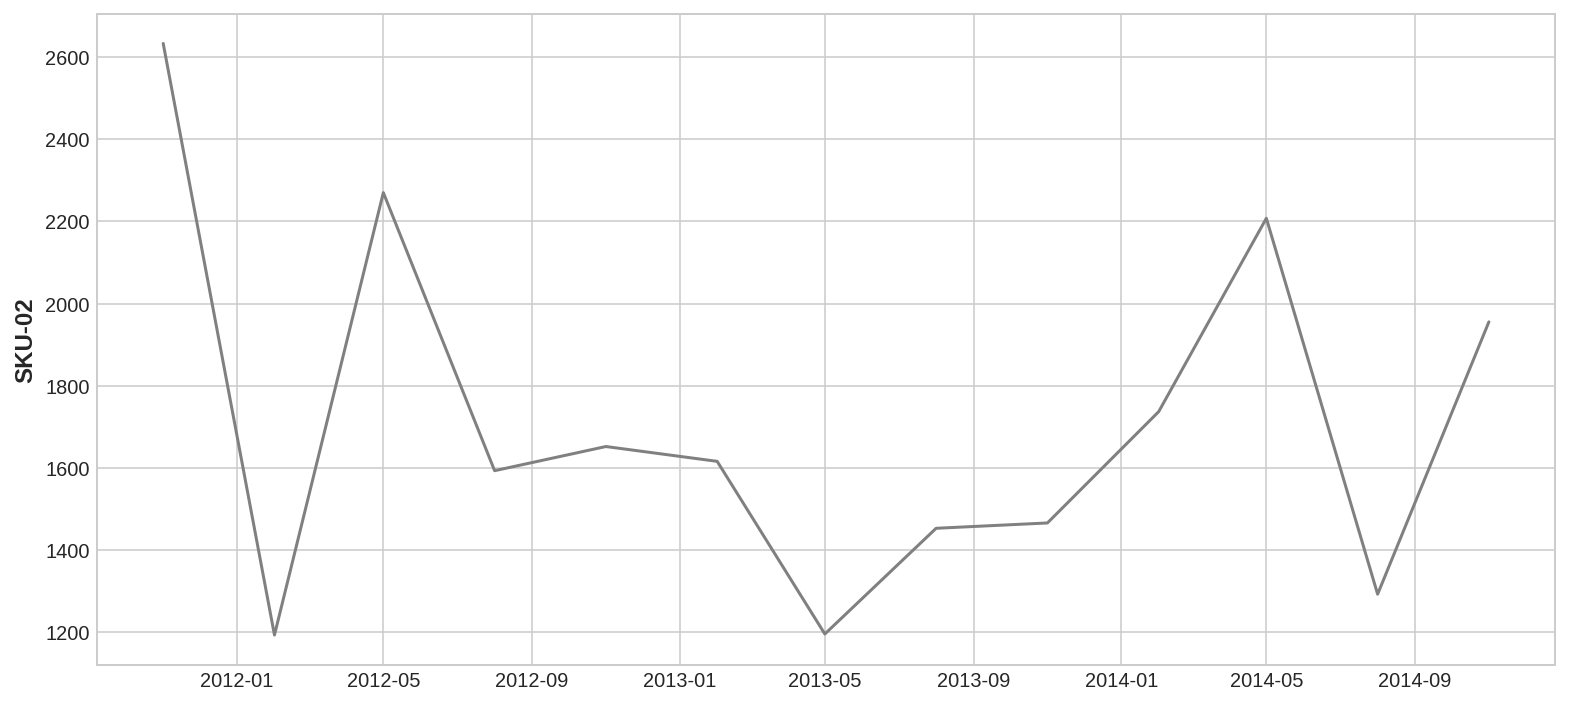

In [44]:
fig, ax = plt.subplots()
ax.plot('DATE', 'val', data=time_s2, color='0.50')
ax.set_ylabel("SKU-02")

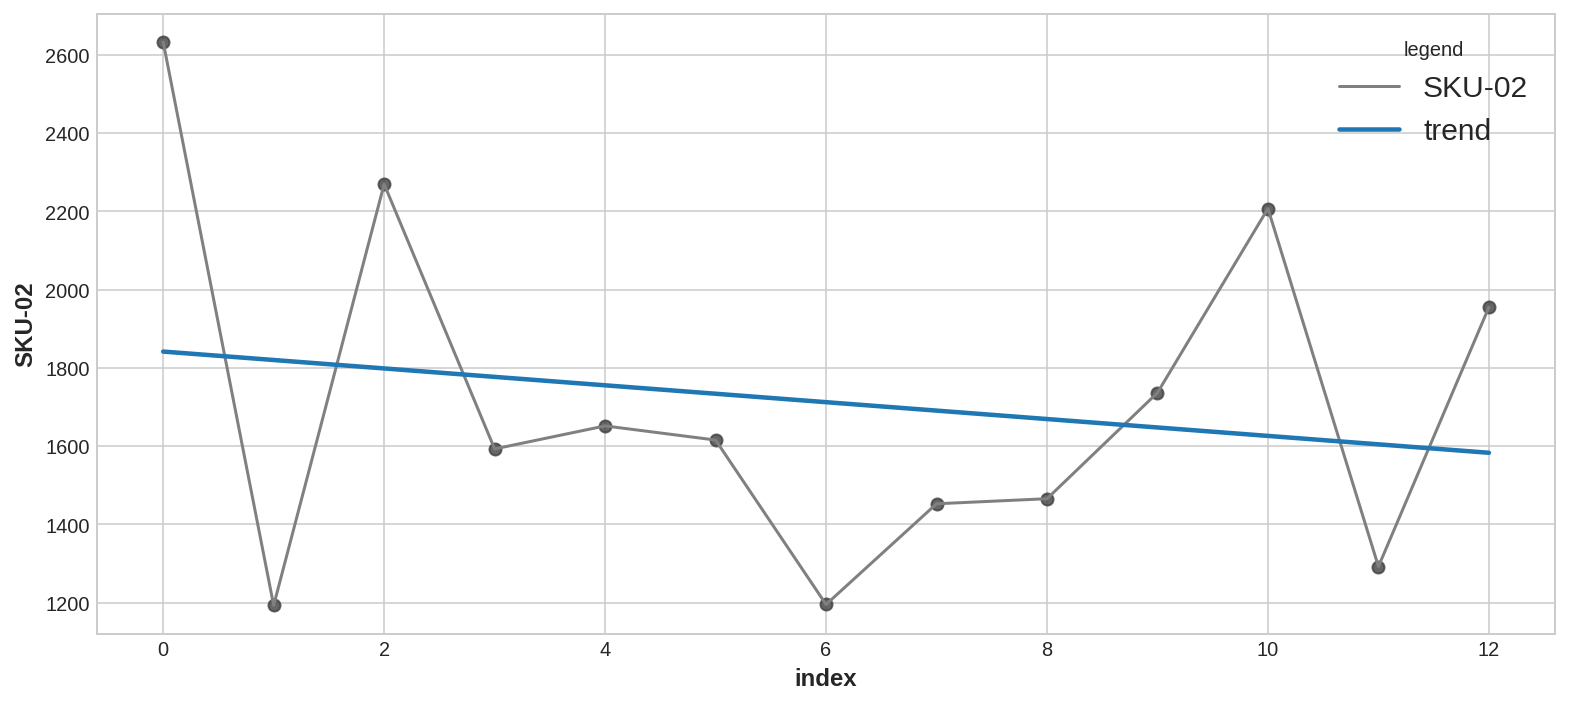

In [51]:
#Trend
fig, ax = plt.subplots()
ax.plot('index', 'val', data=time_s2, color='0.50')
ax = sns.regplot(x='index', y='val', data=time_s2, ci=None, scatter_kws=dict(color='0.25'))
ax.set_ylabel("SKU-02")
ax.legend(["SKU-02", "trend"], title="legend", prop={'size':15})


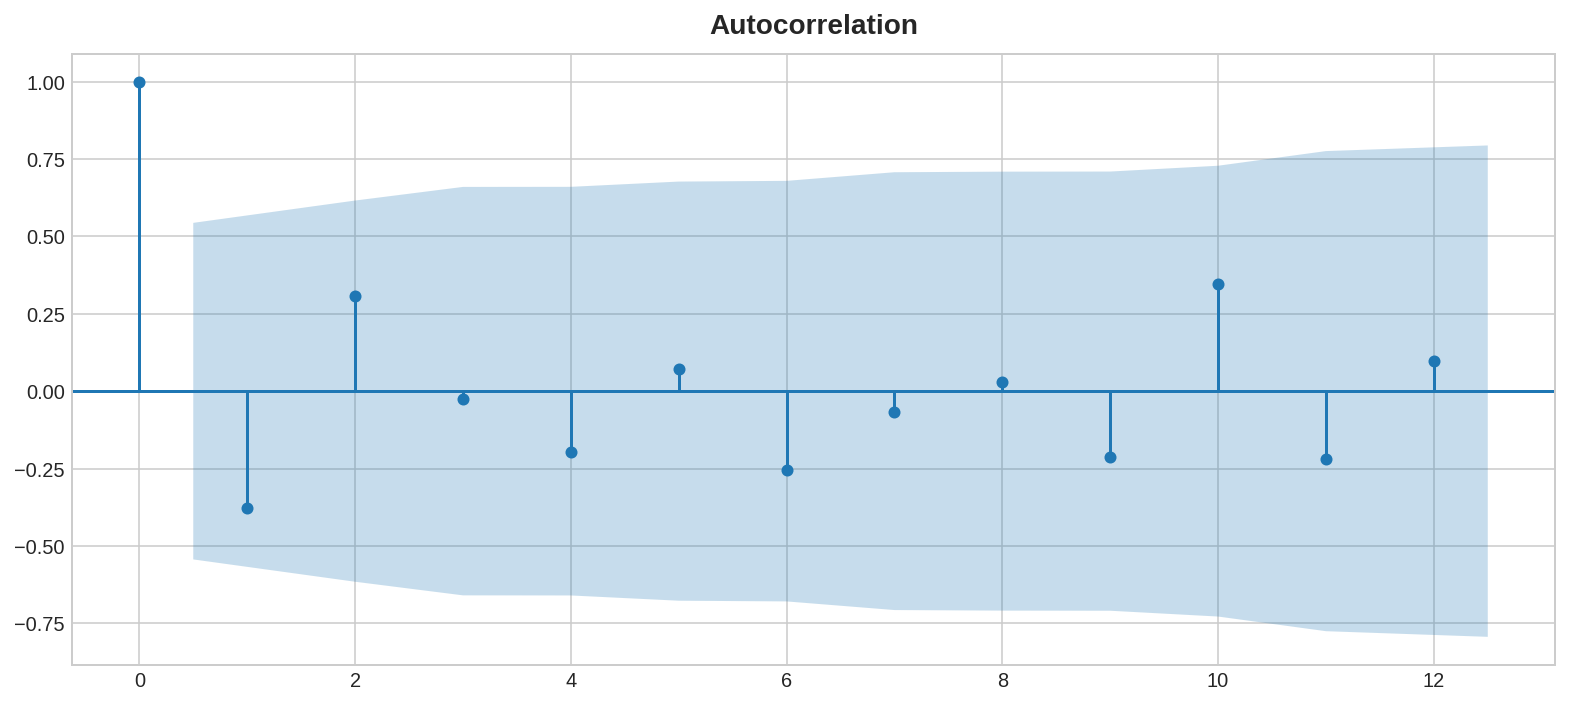

In [52]:
#acf
plot_acf2 = sm.graphics.tsa.plot_acf(time_s2["val"])

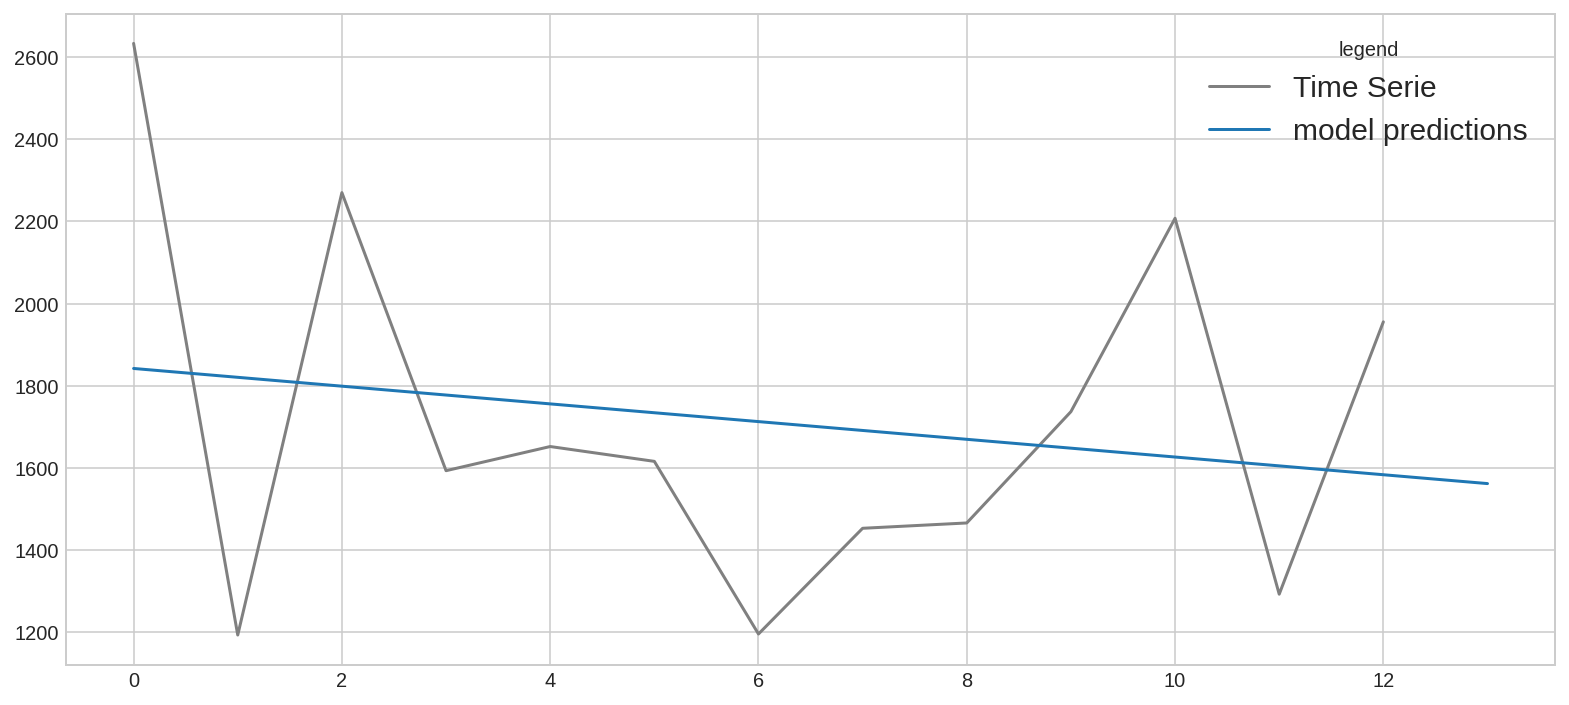

In [56]:
#Let apply linear regression
model_l = LinearRegression()
X = time_s2.loc[:,["index"]]
y = time_s2.loc[:,"val"]

model_l.fit(X, y)

val_to_predict = pd.DataFrame({"index": [13]})
val_to_predict = pd.concat([X, val_to_predict], axis=0)

predictions = model_l.predict(val_to_predict)

fig, ax = plt.subplots()

ax.plot('index', 'val', data=time_s2, color='0.50')
plt.plot(predictions)
ax.legend(["Time Serie", "model predictions"], title="legend", prop={"size":15})

In [59]:
predictions[13]

1561.6980769230768

<AxesSubplot:>

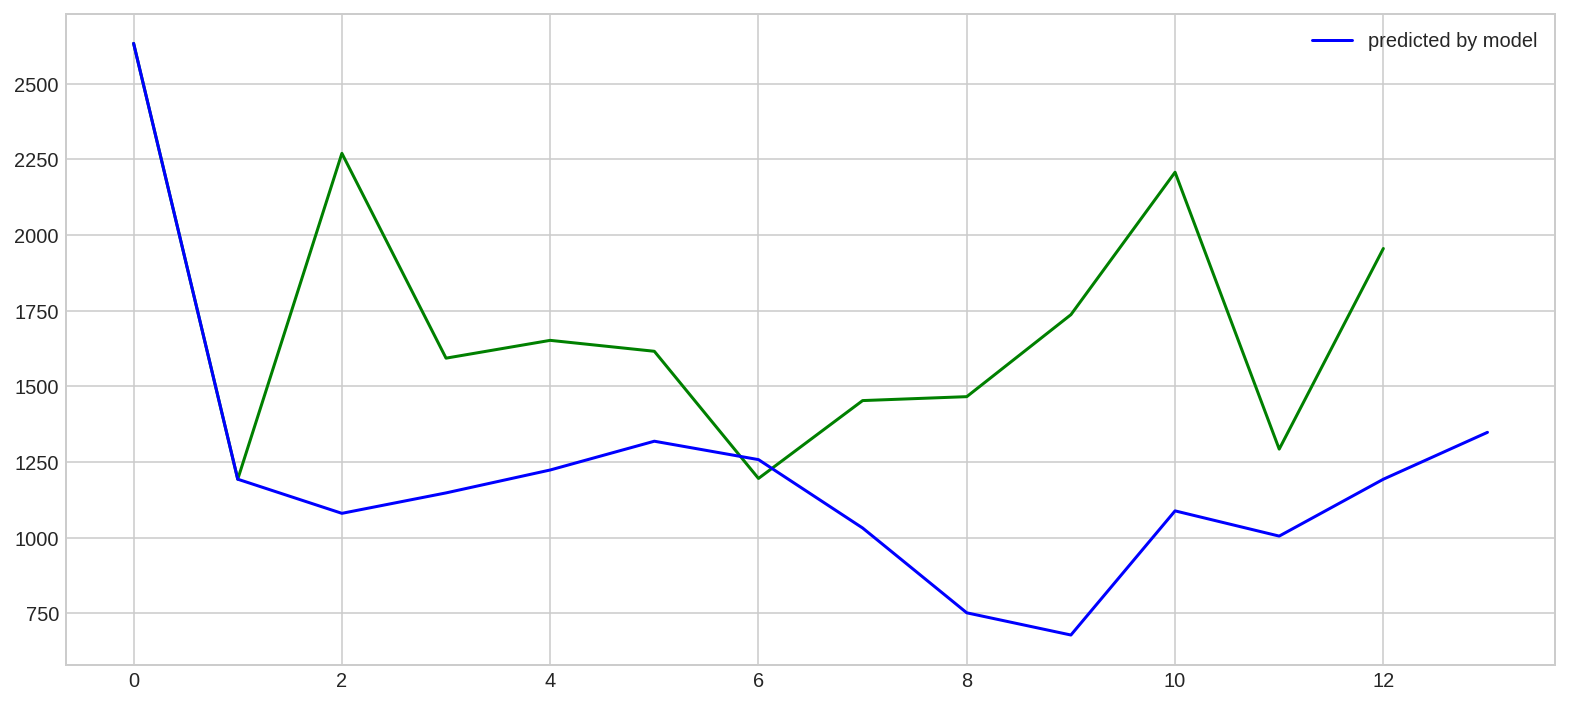

In [55]:
#Let us observe the curve of values predicted by model and real values
fig, ax = plt.subplots()
values_pred = list()

for e in range(1,len(time_s2)):
    SES = ExponentialSmoothing(time_s1.loc[:e,'val']).fit(smoothing_level=alpha,optimized=False)
    values_pred.append(SES.forecast(1).iloc[0])

#differentes values predicted
values_pred = time_s2.loc[:1,"val"].to_list()+values_pred 
values_pred = pd.DataFrame(values_pred, index=list(range(len(values_pred))), columns=["predicted by model"])


#graph plotting
ax.plot("index", "val", data=time_s2, color="green")
values_pred.plot(ax=ax, color="blue")



In [ ]:
#graphics with date
date = time_s2.DATE.to_list()
values_pred["DATE"] = date+[pd.Timestamp('2015-02-01 00:00:00')]
values_pred['index'] = np.arange(len(values_pred))
fig, ax = plt.subplots()
ax.plot("DATE", "val", data=time_s2, color="green")
ax.plot("DATE", "predicted by model", data=values_pred, color="blue")

In [ ]:
#predicted value for the next quater
values_pred.iloc[-1]

In [57]:
#Let's choose the best model
y_value = time_s2["val"].to_list()
y_pred = list(predictions[:-1])
score1 = mean_absolute_error(y_value, y_pred)
print(f"score for linear regression: {score1}")
y_pred = values_pred["predicted by model"].iloc[:-1].to_list()
score2 = mean_absolute_error(y_value, y_pred)
print(f"score for Exponential Smoothing: {score2} ")

score for linear regression: 354.515663567202
score for Exponential Smoothing: 521.8879813071369 


PREDICTION

In [58]:
#The best model is Linear Regression
pred = predictions[-1]
print(f"For the next quater predicton is: {pred} ")

For the next quater predicton is: 1561.6980769230768 
